#Colab 搭配 OpenVINO Pretrained Model 人臉偵測範例

使用OpenVINO加上人臉偵測預訓練模型及物件偵測範例完成人臉偵測應用，本範例對於各種角度的人臉皆有不錯的偵測能力。  
參考資料來源：https://docs.openvino.ai/latest/omz_models_model_face_detection_retail_0005.html  
歐尼克斯實境互動工作室 OmniXRI Jack, 2022.04.25 整理製作

# 1. 安裝Intel OpenVINO工具包
以apt方式安裝OpenVINO，安裝版本為 2021.4.752  
預設安裝路徑為/opt/intel/OpenVINO_2021.4.752，系統會自建出/opt/intel/OpenVINO_2021捷徑名稱，後續可使用這個較短捷徑名稱。  
若想安裝其它版本，可透過下列指令進行查詢。  
!apt-cache search intel-openvino

In [1]:
# 顯示目前工作目錄
!pwd
# 取得OpenVINO 2021公開金錀
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 加入OpenVINO公開金錀到系統金錀群中
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 建立更新安裝清單檔案
!touch /etc/apt/sources.list.d/intel-openvino-2021.list
# 將下載指令加入安裝清單中
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" >> /etc/apt/sources.list.d/intel-openvino-2021.list
# 更新系統
!apt update
# 安裝OpenVINO到虛擬機系統中
!apt install intel-openvino-dev-ubuntu18-2021.4.752 
# 列出安裝路徑下內容進行確認
!ls /opt/intel

/content
--2022-04-26 02:31:07--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.100.114.182, 2600:1409:9800:a86::4b23, 2600:1409:9800:a97::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.100.114.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.1’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2022-04-26 02:31:07 (45.9 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.1’ saved [939/939]

OK
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://apt.repos.intel.com/openvino/2021 all InRelease
Hit:5 https://developer.download.nvidia.com/

# 2. 下載人臉偵測模型
可選用下列物件（人臉）偵測模型，更多可選用模型可參考
https://docs.openvinotoolkit.org/latest/object_detection_models_intel.html 

*   face-detection-adas-xxxx 
*   face-detection-retail-xxxx
*   face-detection-xxxx  

這裡選用 **--name face-detection-retail-0005**  （可自行變更所需模型名稱）  
注意！執行OpenVINO功能前記得設定環境變數（setupvars.sh），否則會得到錯誤訊息。  


In [2]:
# 執行環境設定批次檔並以模型下載器取得模型
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py \
--name face-detection-retail-0005

[setupvars.sh] OpenVINO environment initialized
################|| Downloading face-detection-retail-0005 ||################

========== Downloading /content/intel/face-detection-retail-0005/FP32/face-detection-retail-0005.xml
... 100%, 166 KB, 472 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP32/face-detection-retail-0005.bin
... 100%, 3987 KB, 4764 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16/face-detection-retail-0005.xml
... 100%, 166 KB, 471 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16/face-detection-retail-0005.bin
... 100%, 1993 KB, 2834 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16-INT8/face-detection-retail-0005.xml
... 100%, 423 KB, 909 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16-INT8/face-detection-retail-0005.bin
... 100%, 1073 KB, 1813 

# 3. 模型優化
如果下載的是Intel's Pretrained Model則不需轉換就自帶IR檔(xml,bin)  
若是Public Pretrained Model則須進行轉換成IR檔，系統會自動判別。  
--name 參數為待轉換模型名稱  

In [3]:
# 下載及安裝test-generator 方便檢查程式運行錯誤
!pip install test-generator==0.1.1

# 執行環境設定批次檔並將下載到的模型檔進行優化轉換產生IR(xml & bin)檔
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/converter.py \
--name face-detection-retail-0005

[setupvars.sh] OpenVINO environment initialized
========== Skipping face-detection-retail-0005 (no conversions defined)



檢查模型轉檔後會產生/FP16, FP16-INT8, FP32不同精度的IR檔(xml, bin)

In [4]:
!ls /content/intel/face-detection-retail-0005
!ls /content/intel/face-detection-retail-0005/FP32

FP16  FP16-INT8  FP32
face-detection-retail-0005.bin	face-detection-retail-0005.xml


# 4. 準備測試影像
從網路獲取任意一張測試影像並顯示。  
若要從Github中取得影像時，需將原檔案路徑修改為原始檔型式。  
首先在Github原始影像上以滑鼠右鍵點擊，選擇「複製圖片鏈結」取得影像原始網址： https://github.com/OmniXRI/Colab_DevCloud_OpenVINO_Samples/blob/main/dataset/face_detection_01.jpg  
接著修改後檔名：主要是將github.com變成raw.githubusercontent.com，把/blob/main改成master路徑名稱，其它子路徑保留  
https://raw.githubusercontent.com/OmniXRI/Colab_DevCloud_OpenVINO_Samples/master/dataset/face_detection_01.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


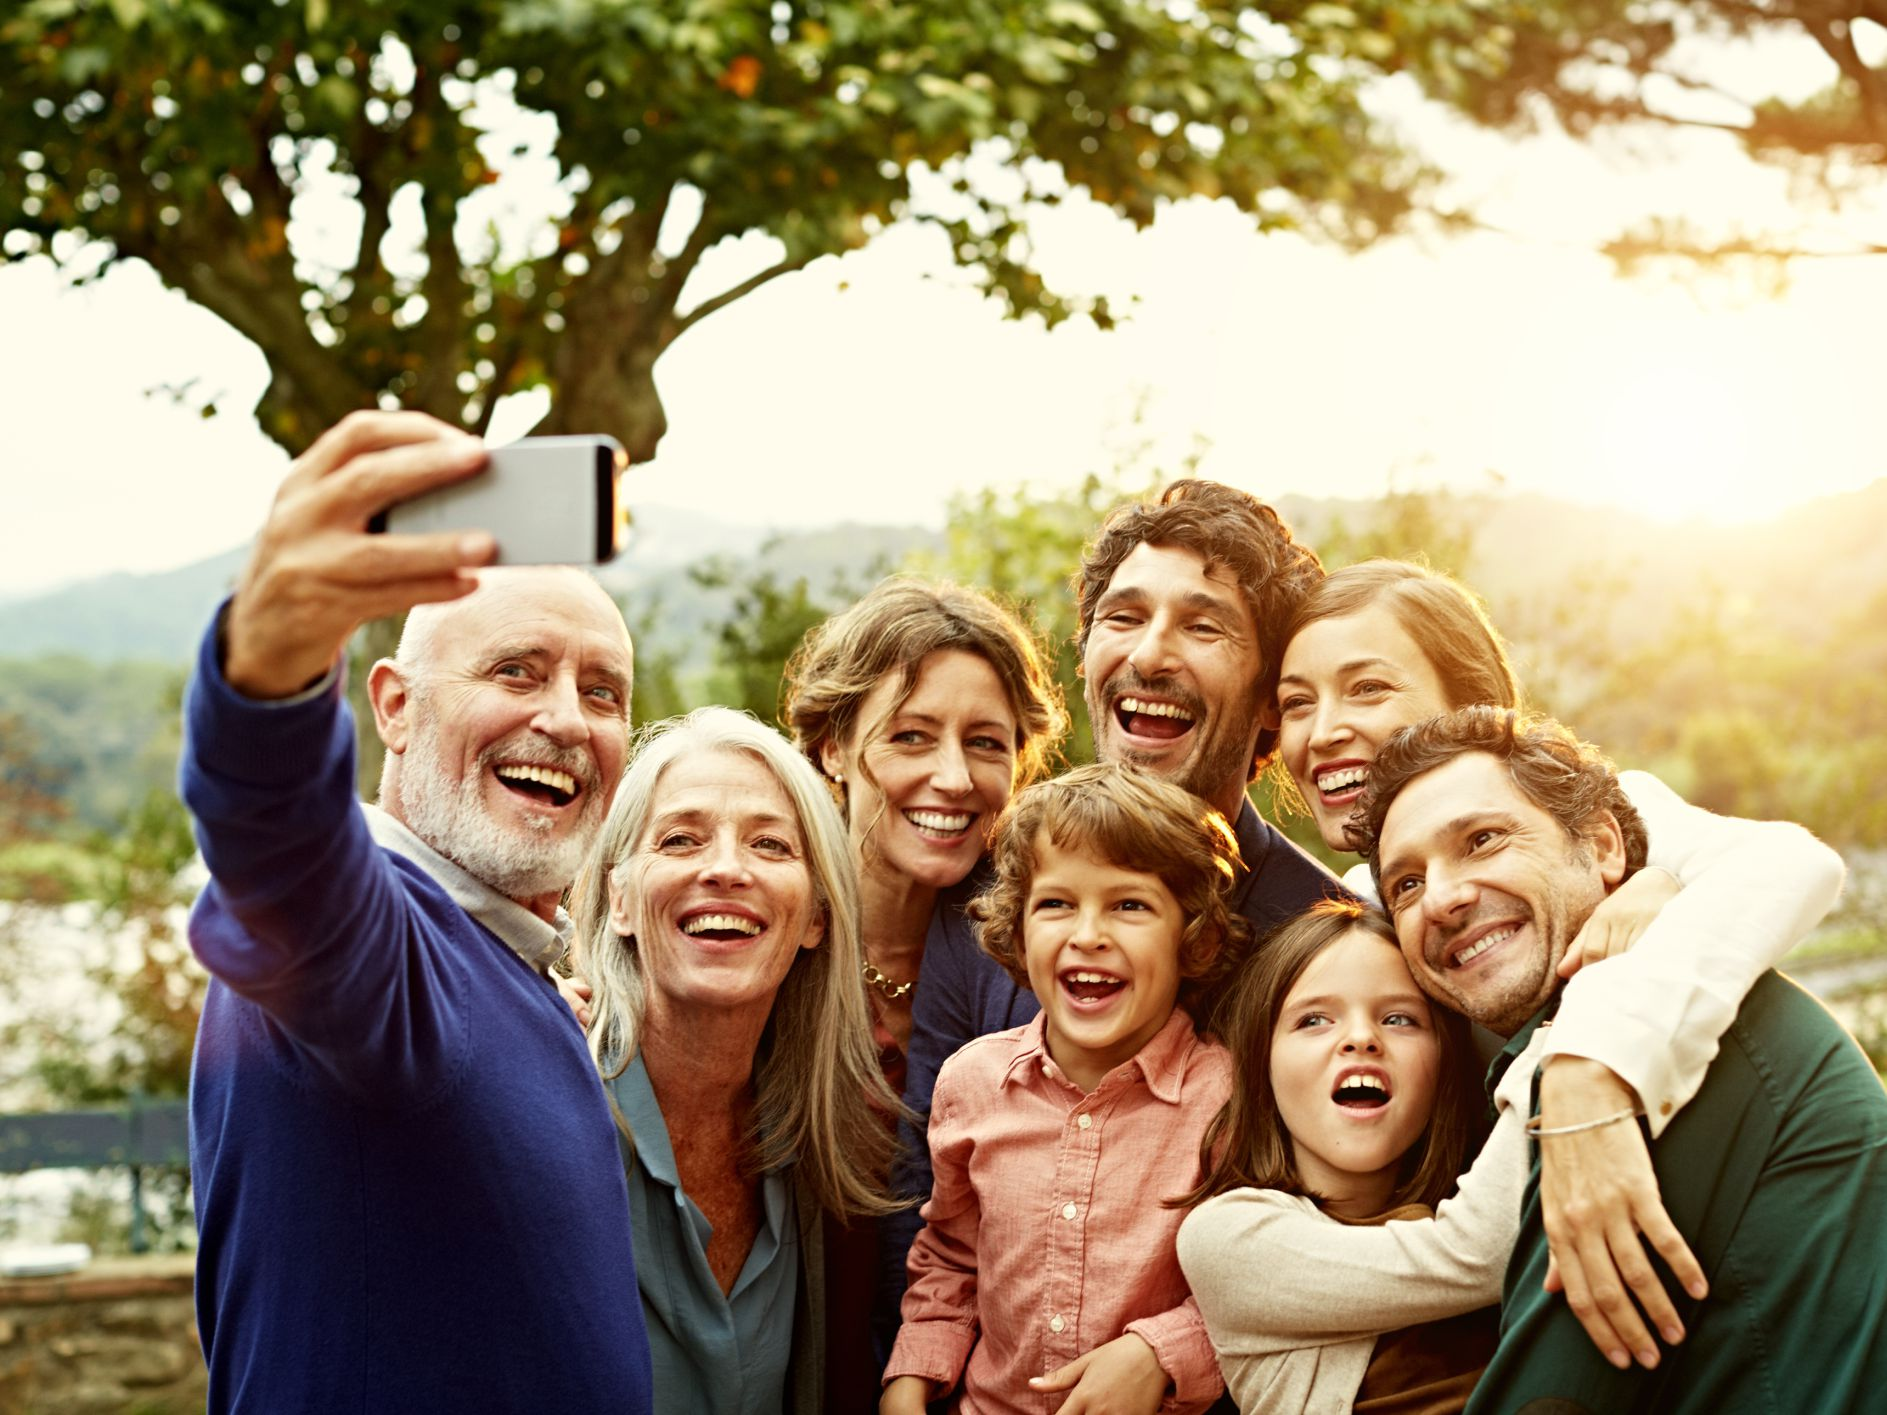

In [5]:
# 以OpenCV檢視輸入影像
import cv2 # 導入OpenCV套件包
from google.colab.patches import cv2_imshow # 導入顯示OpenCV格式影像套件包
import numpy as np # 導入numpy套件包
import requests # 導入requests套件包

# 從網路獲取一張影像
file = requests.get("https://raw.githubusercontent.com/OmniXRI/Colab_DevCloud_OpenVINO_Samples/master/dataset/face_detection_01.jpg")
# 將影像轉成OpenCV格式
img = cv2.imdecode(np.fromstring(file.content, np.uint8), 1)
cv2.imwrite('face.jpg',img)
cv2_imshow(img) # 顯示輸入影像

為更清楚了解物件偵測範例程式可支援的模型，可將models.lst及使用方式列出來確認。（此步驟可忽略）

In [6]:
!ls /opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/
# 列出可支援的模型名稱及對應的結構類型(architecture_type)
!cat /opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/models.lst

models.lst  object_detection_demo.py  README.md
# This file can be used with the --list option of the model downloader.
# For --architecture_type=centernet
ctdet_coco_dlav0_384
ctdet_coco_dlav0_512
# For --architecture_type=ctpn
ctpn
# For --architecture_type=faceboxes
faceboxes-pytorch
# For --architecture_type=retinaface-pytorch
retinaface-resnet50-pytorch
# For --architecture_type=ssd
efficientdet-d0-tf
efficientdet-d1-tf
face-detection-????
face-detection-adas-????
face-detection-retail-????
faster-rcnn-resnet101-coco-sparse-60-0001
pedestrian-and-vehicle-detector-adas-????
pedestrian-detection-adas-????
pelee-coco
person-detection-????
person-detection-retail-0013
person-vehicle-bike-detection-????
product-detection-0001
retinanet-tf
rfcn-resnet101-coco-tf
ssd300
ssd512
ssd_mobilenet_v1_coco
ssd_mobilenet_v1_fpn_coco
ssd_mobilenet_v2_coco
ssd_resnet50_v1_fpn_coco
ssd-resnet34-1200-onnx
ssdlite_mobilenet_v2
vehicle-detection-????
vehicle-detection-adas-????
vehicle-license-plate-de

In [7]:
# 列出物件偵測程式的參數說明文件 （此步驟可略）
!cat /opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/README.md

# Object Detection Python\* Demo

![example](../object_detection.gif)

This demo showcases inference of Object Detection networks using Sync and Async API.

Async API usage can improve overall frame-rate of the application, because rather than wait for inference to complete,
the app can continue doing things on the host, while accelerator is busy.
Specifically, this demo keeps the number of Infer Requests that you have set using `-nireq` flag.
While some of the Infer Requests are processed by IE, the other ones can be filled with new frame data
and asynchronously started or the next output can be taken from the Infer Request and displayed.

This technique can be generalized to any available parallel slack, for example, doing inference and simultaneously
encoding the resulting (previous) frames or running further inference, like some emotion detection on top of
the face detection results.
There are important performance caveats though, for example the tasks that run in parallel should t

#5. 進行推論
執行環境設定批次檔並執行推論  

輸入參數：  
-d 執行裝置，預設為CPU (Colab提供的Intel Xeon CPU),Colab不支援Intel的GPU,MYRIAD(VPU),FPGA   
-i 輸入影像名稱 (\*.png, \*.jpg ...)  
-m 模型名稱 (\*.xml)  
-o 輸出結果名稱 (\*.png, \*.jpg ...)  

最後顯示推論結果

[setupvars.sh] OpenVINO environment initialized
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

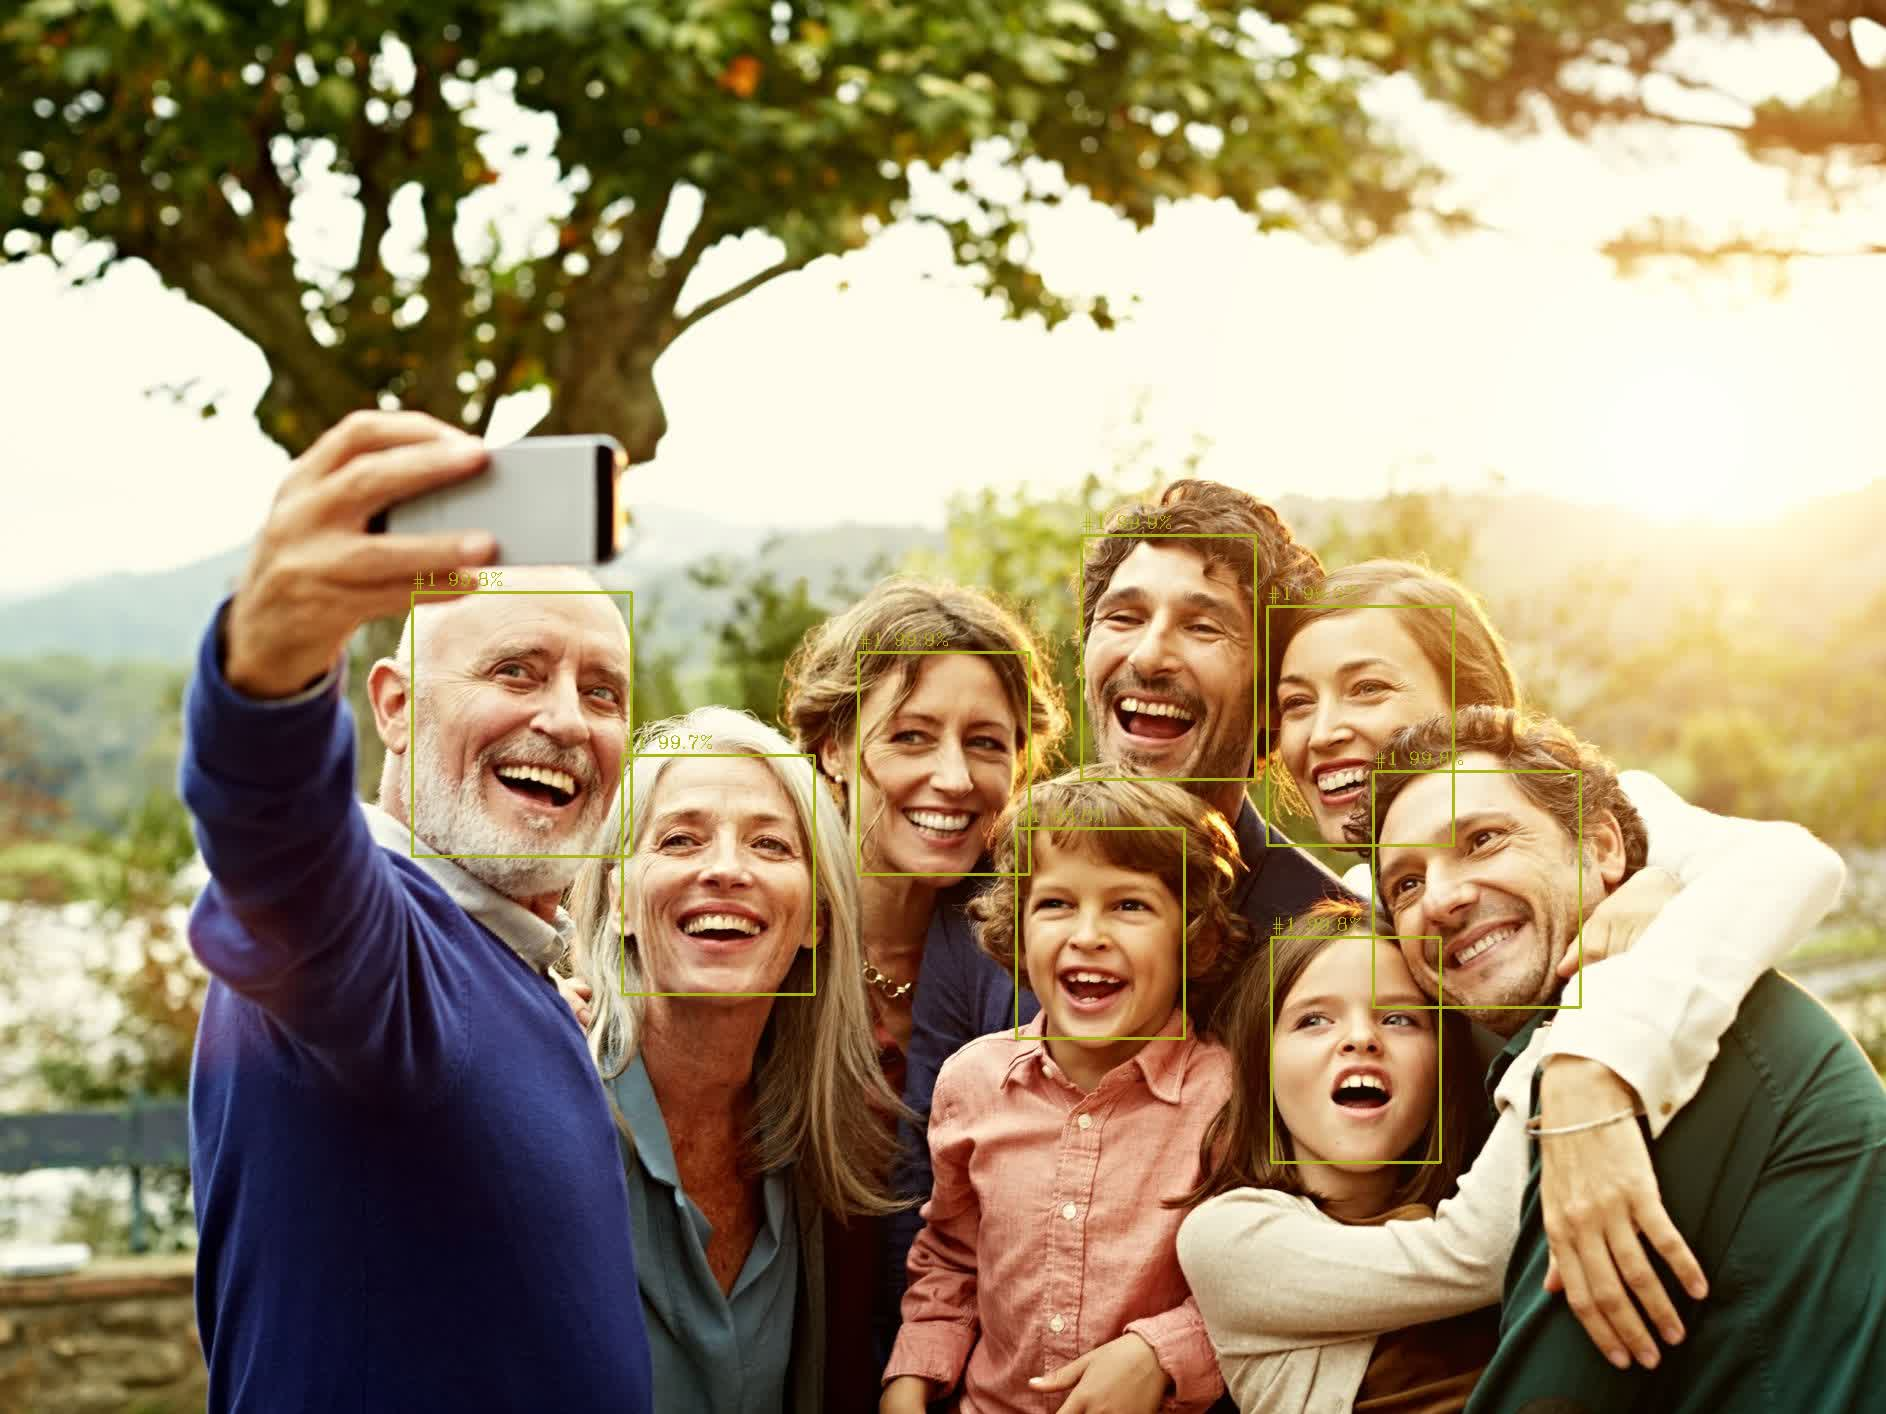

In [8]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python \
/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/object_detection_demo.py -at ssd \
-i 'face.jpg' \
-m /content/intel/face-detection-retail-0005/FP32/face-detection-retail-0005.xml \
-o 'output.jpg'

!ls

out_img = cv2.imread('output.jpg') # 讀入欲顯示影像檔案
cv2_imshow(out_img) # 顯示結果影像